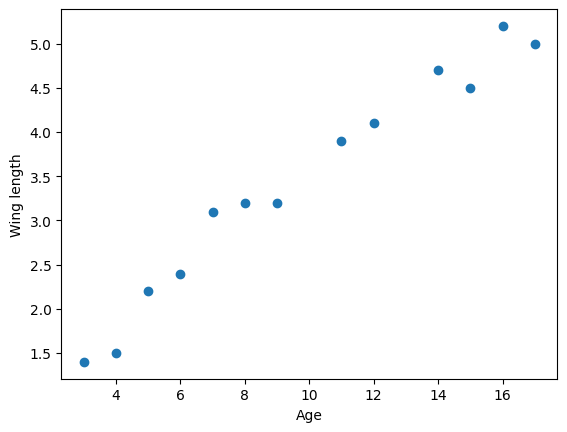

In [3]:
# --------------
# Exercise 1
# --------------
import numpy as np
import matplotlib.pyplot as plt

x = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
y = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]) 

plt.plot(x, y, 'o')
plt.xlabel("Age")
plt.ylabel("Wing length")
plt.show()

Slope: 0.26468412066021585
Intercept: 0.8296243597040451


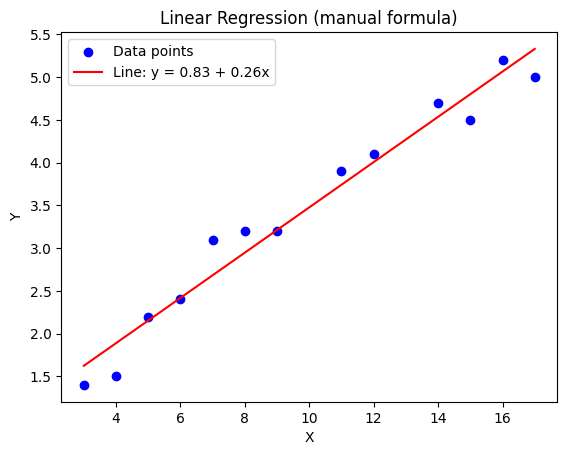

In [4]:
# --------------
# Exercise 2
# --------------
import numpy as np 
import matplotlib.pyplot as plt

n = len(x)

# Apply the formula for slope (b)
slope = ((np.sum(x * y)) - (np.sum(x) * np.sum(y) / n)) / \
        ((np.sum(x**2)) - (np.sum(x)**2 / n))

# Apply the formula for intercept (a)
intercept = np.mean(y) - slope * np.mean(x)

print("Slope:", slope)
print("Intercept:", intercept)

# Predicted values for regression line
y_pred = intercept + slope * x

# Plot
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Line: y = {intercept:.2f} + {slope:.2f}x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (manual formula)')
plt.legend()
plt.show()

In [5]:
# --------------
# Exercise 3
# --------------
import numpy as np 
from scipy import stats 

# sums of squares
y_mean = np.mean(y)
SST = np.sum((y - y_mean)**2)           # total
SSR = np.sum((y_pred - y_mean)**2)      # regression (explained)
SSE = np.sum((y - y_pred)**2)           # residual (unexplained)

# degrees of freedom
df_reg = 1          # simple linear regression
df_res = n - 2

# mean squares
MSR = SSR / df_reg
MSE = SSE / df_res

# F statistic and p-value
F = MSR / MSE
p_value = stats.f.sf(F, df_reg, df_res)   # survival function = 1 - cdf

# for comparison: t-test for slope (should satisfy F = t^2)
# standard error of slope
SE_slope = np.sqrt(MSE / np.sum((x - np.mean(x))**2))
t_stat = slope / SE_slope
p_value_t = 2 * stats.t.sf(np.abs(t_stat), df_res)

# print results
print(f"slope = {slope:.6f}, intercept = {intercept:.6f}")
print(f"SST = {SST:.6f}, SSR = {SSR:.6f}, SSE = {SSE:.6f}")
print(f"MSR = {MSR:.6f}, MSE = {MSE:.6f}")
print(f"F = {F:.6f}, df = ({df_reg}, {df_res}), p-value (F-test) = {p_value:.6f}")
print(f"t = {t_stat:.6f}, df = {df_res}, p-value (t-test) = {p_value_t:.6f}")
print("Note: F ≈ t^2 ->", F, "~", t_stat**2)

slope = 0.264684, intercept = 0.829624
SST = 19.656923, SSR = 18.937131, SSE = 0.719792
MSR = 18.937131, MSE = 0.065436
F = 289.400777, df = (1, 11), p-value (F-test) = 0.000000
t = 17.011783, df = 11, p-value (t-test) = 0.000000
Note: F ≈ t^2 -> 289.40077672737345 ~ 289.4007767273734


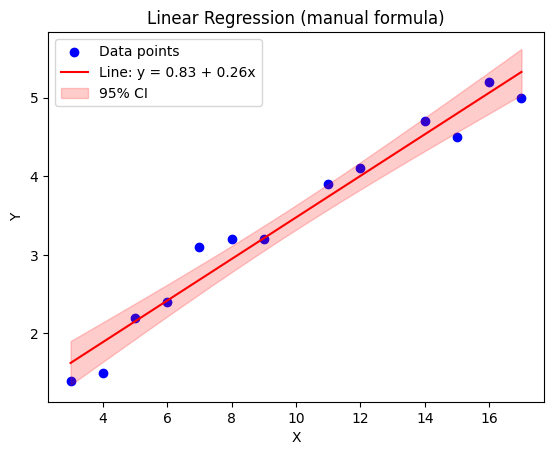

In [ ]:
# --------------
# Exercise 4
# --------------
import numpy as np 
from scipy import stats 

# Fit slope & intercept manually
x_mean = np.mean(x)
y_mean = np.mean(y)
slope = ((np.sum(x * y)) - (np.sum(x) * np.sum(y) / n)) / \
        ((np.sum(x**2)) - (np.sum(x)**2 / n))
intercept = y_mean - slope * x_mean
y_pred = intercept + slope * x

# Residuals and MSE
SSE = np.sum((y - y_pred)**2)
MSE = SSE / (n - 2)
SSx = np.sum((x - x_mean)**2)

# t critical value for CI
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, n - 2)

# Create smooth range of x for line + CI
x_fit = np.linspace(min(x), max(x), 100)
y_fit = intercept + slope * x_fit

# Standard error of predicted mean response
SE_y = np.sqrt(MSE * (1/n + (x_fit - x_mean)**2 / SSx))

# CI bands
ci_upper = y_fit + t_crit * SE_y
ci_lower = y_fit - t_crit * SE_y

# Plot
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label=f'Line: y = {intercept:.2f} + {slope:.2f}x')
plt.fill_between(x_fit, ci_lower, ci_upper, color='red', alpha=0.2, label="95% CI")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (manual formula)')
plt.legend()
plt.show()

In [ ]:
# --------------
# Exercise 5
# --------------
import numpy as np 

# using built-it 
r_python = np.corrcoef(x, y)[0, 1]

print("Pearson's r:", r_python)

Pearson's r: 0.9815203776816279


Slope: 0.1197242564639066
Intercept: 2.8173778209535216


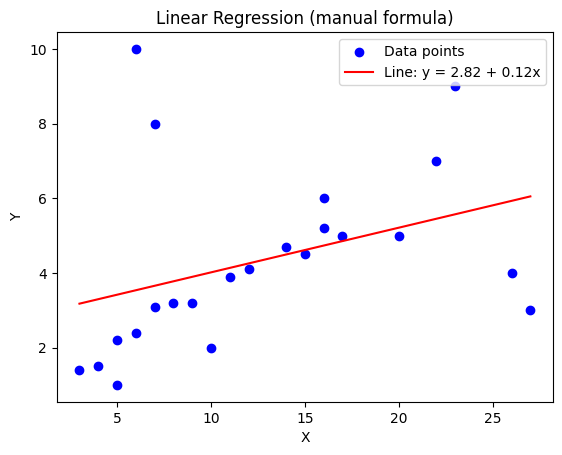

In [15]:
# --------------
# Exercise 6 - NOISY VER.
# --------------
import numpy as np 
import matplotlib.pyplot as plt
import random

x = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
y = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

x_rand = random.sample(range(1, 31), 10)
y_rand = random.sample(range(1, 11), 10)

x_noisy = np.array(x + x_rand)
y_noisy = np.array(y + y_rand)

n = len(x_noisy)

# Apply the formula for slope (b)
slope = ((np.sum(x_noisy * y_noisy)) - (np.sum(x_noisy) * np.sum(y_noisy) / n)) / \
        ((np.sum(x_noisy**2)) - (np.sum(x_noisy)**2 / n))

# Apply the formula for intercept (a)
intercept = np.mean(y_noisy) - slope * np.mean(x_noisy)

print("Slope:", slope)
print("Intercept:", intercept)

# Predicted values for regression line
y_pred = intercept + slope * x_noisy

# Plot
plt.scatter(x_noisy, y_noisy, color='blue', label='Data points')
plt.plot(np.sort(x_noisy), intercept + slope * np.sort(x_noisy),
         color='red', label=f'Line: y = {intercept:.2f} + {slope:.2f}x')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression (manual formula)')
plt.legend()
plt.show()